<a href="https://colab.research.google.com/github/ayush-710/2105710_Ayush_Kumar/blob/main/SpotifySongSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity


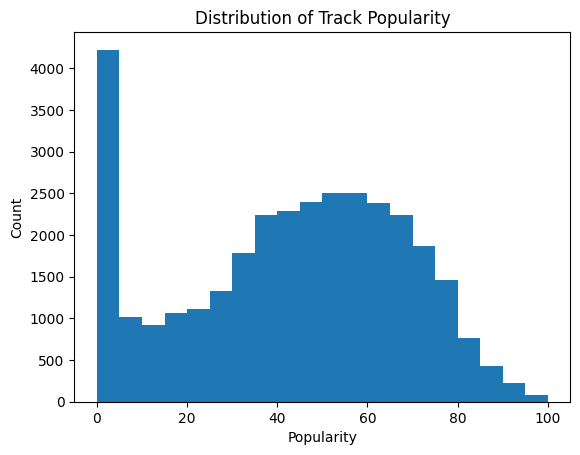

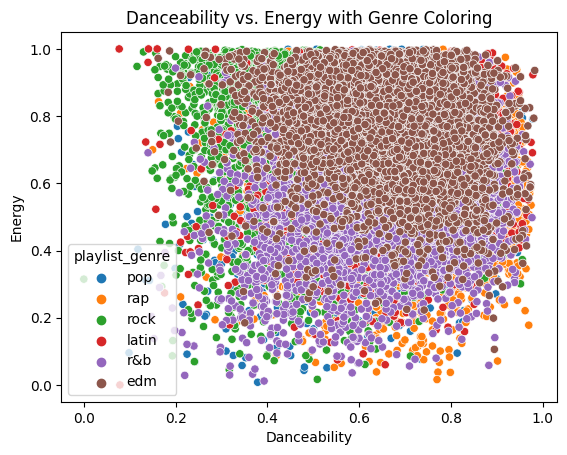

In [ ]:
df = pd.read_csv(r'/content/spotify dataset.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
plt.hist(df['track_popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Track Popularity')
plt.show()

sns.scatterplot(x='danceability', y='energy', data=df, hue='playlist_genre')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy with Genre Coloring')
plt.show()

<ipython-input-7-6319c620f1a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


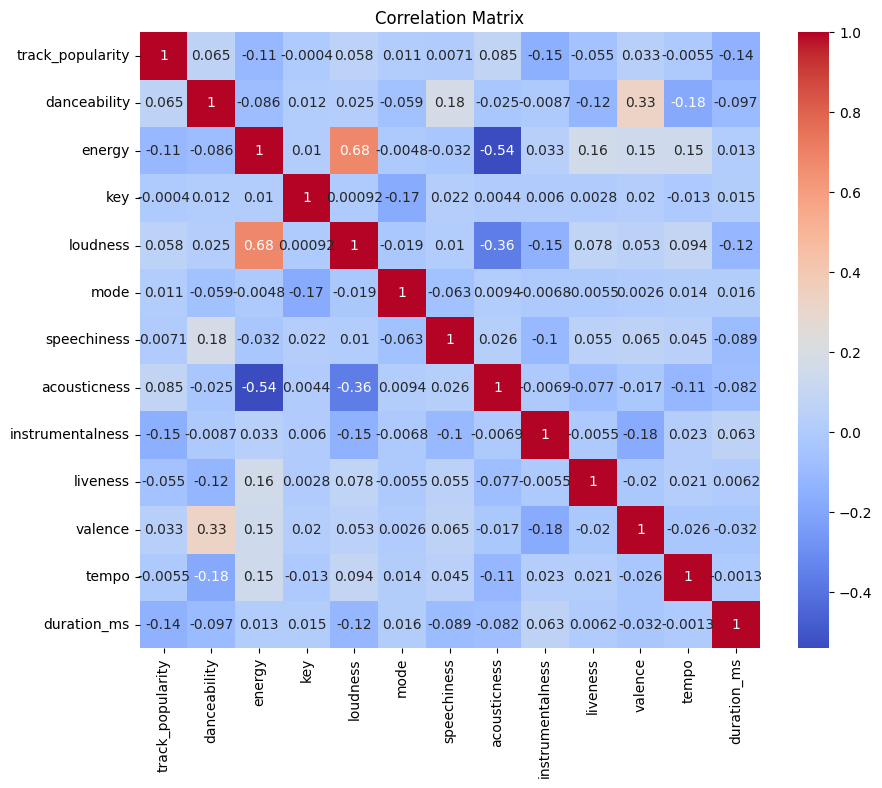

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

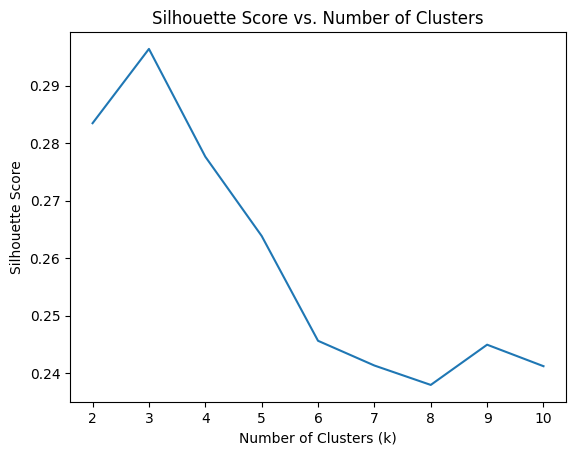

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


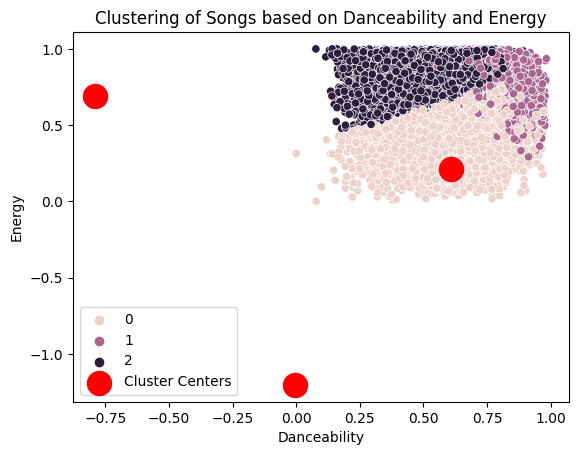

In [ ]:
# Choose features for clustering (e.g., danceability, energy, valence, etc.)
X = df[['danceability', 'energy', 'valence']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
sns.scatterplot(x='danceability', y='energy', data=df, hue='cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster Centers')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clustering of Songs based on Danceability and Energy')
plt.legend()
plt.show()


In [ ]:
# Making recommendations based on the similarity scores between tracks
def get_recommendations(track_id, cosine_sim=cosine_sim):
    if track_id not in df['track_id'].values:
        print(f"Track ID '{track_id}' not found in the dataset.")
        return

    idx = df[df['track_id'] == track_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 similar tracks
    track_indices = [i[0] for i in sim_scores]
    return df.loc[track_indices, 'track_name']

# Testing the recommendation system
track_id_to_test = '6f807x0ima9a1j3VPbc7VN'
#providing track id of the first song from data set
recommended_tracks = get_recommendations(track_id_to_test)
if recommended_tracks is not None:
    print(recommended_tracks)


1662                   Remembering Sunday
13330         You're All I've Got Tonight
11548    Some Like It Hot - 2005 Remaster
6497                             Infrarot
14877                       Any Other Way
Name: track_name, dtype: object
